In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
df=pd.read_csv('fiat500.csv')
df.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [2]:
df['model'].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [3]:
df.shape

(1538, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1538 non-null   int64  
 1   model            1538 non-null   object 
 2   engine_power     1538 non-null   int64  
 3   age_in_days      1538 non-null   int64  
 4   km               1538 non-null   int64  
 5   previous_owners  1538 non-null   int64  
 6   lat              1538 non-null   float64
 7   lon              1538 non-null   float64
 8   price            1538 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 108.3+ KB


In [5]:
df1=pd.read_csv('fiat5001.csv')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1537 non-null   float64
 1   model            1538 non-null   object 
 2   engine_power     1538 non-null   int64  
 3   age_in_days      1538 non-null   int64  
 4   km               1538 non-null   int64  
 5   previous_owners  1538 non-null   int64  
 6   lat              1538 non-null   float64
 7   lon              1538 non-null   float64
 8   price            1538 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 108.3+ KB


In [7]:
df['previous_owners'].unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
df.groupby(['model']).count()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
model,,,,,,,,
lounge,1094,1094,1094,1094,1094,1094,1094,1094
pop,358,358,358,358,358,358,358,358
sport,86,86,86,86,86,86,86,86


In [112]:
df.groupby(["previous_owners"]).count()
newdf=pd.DataFrame(columns=['Model','Prev_owner'])
newdf['Model']=df['model'].drop('pop',axis=0)

KeyError: "['pop'] not found in axis"

In [10]:
list(df)
#data2=pd.get_dummies(data2,dtype=int)

['ID',
 'model',
 'engine_power',
 'age_in_days',
 'km',
 'previous_owners',
 'lat',
 'lon',
 'price']

In [46]:
#data2=df['model']
#data2=pd.get_dummies(data2,dtype=int)

bell curve
left skewness
right skewness

actual | predicted | error | error^2
  10        12        2         4
  5          3        -2        4
  8          10       2         4
  7          5        -2        4

  error^2 / n

In [11]:
df.drop(['ID','lat','lon'],axis=1)

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [37]:
model1={'lounge':1,'pop':2,'sport':3}
df['model']=df['model'].replace(model1)
X=df.drop(['price','ID','lat','lon'],axis=1)
y=df['price']

In [48]:
X #y=constant*X

,model,engine_power,age_in_days,km,previous_owners
0,1,51,882,25000,1
1,2,51,1186,32500,1
2,3,74,4658,142228,1
3,1,51,2739,160000,1
4,2,73,3074,106880,1
...,...,...,...,...,...
1533,3,51,3712,115280,1
1534,1,74,3835,112000,1
1535,2,51,2223,60457,1
1536,1,51,2557,80750,1


In [49]:
y

0       8900
1       8800
2       4200
3       6000
4       5700
        ... 
1533    5200
1534    4600
1535    7500
1536    5990
1537    7900
Name: price, Length: 1538, dtype: int64

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)

In [78]:
regm=LinearRegression()

In [79]:
X_train.head(5)

,model,engine_power,age_in_days,km,previous_owners
70,2,51,1096,41950,1
500,1,51,2527,25191,1
10,2,51,790,43286,1
789,1,51,821,19000,2
505,1,51,456,11186,1


In [87]:
X_train.shape

(999, 5)

In [80]:
X_test.head(5)

,model,engine_power,age_in_days,km,previous_owners
1440,1,51,4474,143900,1
54,1,51,701,11200,1
298,1,51,397,19286,1
1335,1,51,366,12950,1
861,1,51,821,26333,1


In [88]:
X_test.shape

(539, 5)

In [81]:
regm.fit(X_train,y_train)

LinearRegression()

In [92]:
y_train.shape

(999,)

In [93]:
y_test.shape

(539,)

In [94]:
ypred=regm.predict(X_test)

In [95]:
ypred.shape

(539,)

In [96]:
ypred

array([ 4554.9337749 , 10185.41589701, 10294.20405312, 10436.8075043 ,
        9805.92147831,  6830.94061843, 10442.34767252, 10383.91513236,
        9979.51436856,  6636.65447299,  9582.69510232,  5271.07828873,
        9750.50408525, 10006.01804813, 10501.12743981,  5915.79491135,
        9920.62582547, 10256.79066298, 10428.07290247,  9990.56441312,
        9903.10650712,  7009.82616865,  9682.71602938,  8360.611861  ,
        8417.12836224,  9813.46985217,  9802.2687761 ,  9900.53490297,
        7557.50531992,  5769.37398702,  7841.43263172, 10381.69151899,
        6829.29209795,  8634.65189886,  9377.26265439,  8698.89824374,
        5233.50595034,  9905.12215232,  8513.77952041,  5078.09467648,
       10343.18717951,  4474.51273487,  6831.26299357,  9218.61870648,
        9092.28060324, 10520.99475121,  9719.44777567,  9075.36489595,
        9305.34323787,  6899.66467703,  7707.03308719,  5442.1150963 ,
        7960.93657429,  5954.23405445,  7182.4026424 ,  5023.46821885,
      

In [97]:
from sklearn.metrics import r2_score

In [98]:
acc=r2_score(ypred,y_test)

In [86]:
acc


0.8229125338402791

In [100]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape_value=mape(y_test,ypred)
mape_value

0.07566032307200132

In [101]:
from sklearn.metrics import mean_squared_error 
t=mean_squared_error(y_test,ypred)
print(t**.5)

754.9332039867639


In [105]:
#Results=pd.DataFrame(columns=['Actual','Predicted'])
#Results['Actual']=y_test
Results=pd.DataFrame(columns=['Price','Predicted'])
Results['Price']=y_test
Results['Predicted']=ypred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(8)

,index,Price,Predicted,Id
0,1440,5400,4554.933775,0
1,54,10600,10185.415897,1
2,298,9980,10294.204053,2
3,1335,10400,10436.807504,3
4,861,9800,9805.921478,4
5,842,7100,6830.940618,5
6,271,9980,10442.347673,6
7,527,9990,10383.915132,7


C:\Users\MGIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MGIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MGIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MGIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

<Axes: xlabel='Id', ylabel='Price'>

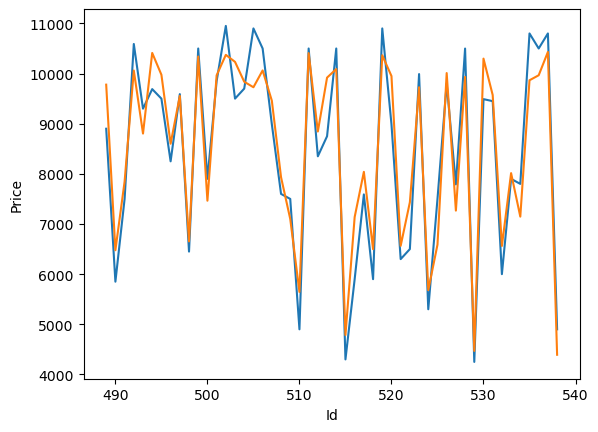

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Price',data=Results.tail(50))
sns.lineplot(x='Id',y='Predicted',data=Results.tail(50))

In [115]:
test=df1.loc[(df1.model=='lounge')]
#dat2000=data.loc[(data.year==2000)]

In [116]:
test

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,NaN,lounge,51,882,25000,1,44.907242,8.611560,8900
3,4.0,lounge,51,2739,160000,1,40.633171,17.634609,6000
6,7.0,lounge,51,731,11600,1,44.907242,8.611560,10750
7,8.0,lounge,51,1521,49076,1,41.903221,12.495650,9190
11,12.0,lounge,51,366,17500,1,45.069679,7.704920,10990
...,...,...,...,...,...,...,...,...,...
1528,1529.0,lounge,51,2861,126000,1,43.841980,10.515310,5500
1529,1530.0,lounge,51,731,22551,1,38.122070,13.361120,9900
1530,1531.0,lounge,51,670,29000,1,45.764648,8.994500,10800
1534,1535.0,lounge,74,3835,112000,1,45.845692,8.666870,4600
